# Convolutional Neural Network

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
import keras_metrics 

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('PlantVillage/Training',
                                                 target_size = (96, 96),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1978 images belonging to 2 classes.


### Preprocessing the Test set

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('PlantVillage/Testing',
                                            target_size = (96, 96),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 496 images belonging to 2 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[96, 96, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
cnn.add(tf.keras.layers.Flatten())

In [8]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [9]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [10]:

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',keras_metrics.precision(), keras_metrics.recall()])

### Training the CNN

In [11]:
model = cnn.fit(x = training_set, validation_data = test_set, epochs = 16)

Epoch 1/16


C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\keras\engine\base_layer.py:1307: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


62/62 [==============================] - 28s 415ms/step - loss: 0.5272 - accuracy: 0.7427 - precision: 0.6990 - recall: 0.6585 - val_loss: 0.3230 - val_accuracy: 0.8810 - val_precision: 0.7860 - val_recall: 0.8185
Epoch 2/16
62/62 [==============================] - 23s 363ms/step - loss: 0.3085 - accuracy: 0.8726 - precision: 0.8167 - recall: 0.8564 - val_loss: 0.2683 - val_accuracy: 0.8851 - val_precision: 0.8298 - val_recall: 0.8765
Epoch 3/16
62/62 [==============================] - 27s 428ms/step - loss: 0.2670 - accuracy: 0.8964 - precision: 0.8381 - recall: 0.8886 - val_loss: 0.2671 - val_accuracy: 0.8831 - val_precision: 0.8479 - val_recall: 0.9019
Epoch 4/16
62/62 [==============================] - 32s 511ms/step - loss: 0.2053 - accuracy: 0.9090 - precision: 0.8546 - recall: 0.9096 - val_loss: 0.1791 - val_accuracy: 0.9395 - val_precision: 0.8622 - val_recall: 0.9154
Epoch 5/16
62/62 [==============================] - 37s 603ms/step - loss: 0.1870 - accuracy: 0.9262 - precisio

## Prediction

In [12]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('PlantVillage/predict/healthy.jpg', target_size = (96, 96))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Healthy Pepper'
else:
  prediction = 'Bacteria Pepper'

In [13]:
print(prediction)

Healthy Pepper


## Plot

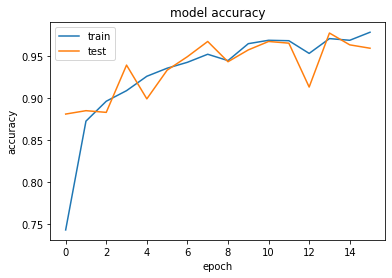

In [14]:
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

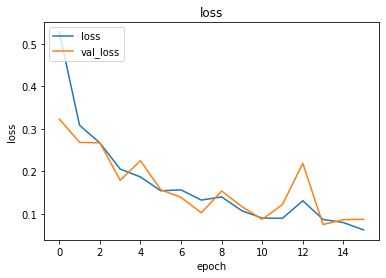

In [15]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1982592   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1